<a href="https://colab.research.google.com/github/vamado09/Applied-Data-Science/blob/main/Week2_VicenteDeLeon_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.2 Data Transformation - Coding Assesment Part 2 (Week2)

Vicente De Leon

IU_id: 2001014594

APPLIED DATA SCIENCE: 9998

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Duplicates

In [ ]:
# Food catgoery dataframe (based on pricing analytics job)
data = {
    'Protein Category': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meat',
                         'Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meat']  # adding couple of duplicates
}

df_protein = pd.DataFrame(data)
df_protein

,Protein Category
0,Poultry
1,Beef
2,Pork
3,Seafood
4,Specialty Meat
5,Poultry
6,Beef
7,Pork
8,Seafood
9,Specialty Meat


The duplicated method will return booleans indicating wether each row is a duplicated or (True vs False).

In [ ]:
df_protein.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,True
6,True
7,True
8,True
9,True


In [ ]:
# dropping the above duplicates

df_protein.drop_duplicates() # no more duplicates

,Protein Category
0,Poultry
1,Beef
2,Pork
3,Seafood
4,Specialty Meat


Default:

In [ ]:
df_protein.drop_duplicates(subset=['Protein Category']) # dropping duplicates (keeping first occurence)

,Protein Category
0,Poultry
1,Beef
2,Pork
3,Seafood
4,Specialty Meat


Keeping the last occurrence:

In [ ]:
df_protein.drop_duplicates(subset=['Protein Category'], keep='last') # heeping last occurence

,Protein Category
5,Poultry
6,Beef
7,Pork
8,Seafood
9,Specialty Meat


## Transforming Data Using a Function or Mapping

In [ ]:
data = {
    'food': ['bacon', 'pulled pork', 'salmon', 'pichana', 'ground beef',
             'turkey', 'skirt steak', 'tilapia', 'ground chicken'],
    'ounces': [4.0, 3.0, 12.0, 6.0, 7.5, 8.0, 3.0, 5.0, 6.0] # adding oz because somethimes I get empty values for price per lb and I need to do the conversion
}

df_foods = pd.DataFrame(data)
df_foods['pounds'] = df_foods['ounces'] / 16 # conversion
df_foods[['food', 'pounds']]

,food,pounds
0,bacon,0.25000
1,pulled pork,0.18750
2,salmon,0.75000
3,pichana,0.37500
4,ground beef,0.46875
5,turkey,0.50000
6,skirt steak,0.18750
7,tilapia,0.31250
8,ground chicken,0.37500


Mapping into food catgeories -> poultry, beef, pork, seafood

In [ ]:
category = {
    'bacon': 'Pork',
    'pulled pork': 'Pork',
    'salmon': 'Seafood',
    'pichana': 'Beef',
    'ground beef': 'Beef',
    'turkey': 'Poultry',
    'skirt steak': 'Beef',
    'tilapia': 'Seafood',
    'ground chicken': 'Poultry'
}


df_foods['Protein Category'] = df_foods['food'].map(category) # # assigning categories to the items

df_foods[['food', 'pounds', 'Protein Category']]

,food,pounds,Protein Category
0,bacon,0.25000,Pork
1,pulled pork,0.18750,Pork
2,salmon,0.75000,Seafood
3,pichana,0.37500,Beef
4,ground beef,0.46875,Beef
5,turkey,0.50000,Poultry
6,skirt steak,0.18750,Beef
7,tilapia,0.31250,Seafood
8,ground chicken,0.37500,Poultry


In [ ]:
# my function
def category_mapping(foods, ounces, category_map=None):
    df = pd.DataFrame({
        'food': foods,
        'ounces': ounces
    })

    df['pounds'] = df['ounces'] / 16 # -> converting ounces to lbs
    df.drop(columns=['ounces'], inplace = True) # dorpping the ounces


    # mapping item to their respective ctagoery -> if provided
    if category_map:
        df['Protein Category'] = df['food'].map(category_map)

    return df

In [ ]:
foods = ['bacon', 'pulled pork', 'salmon', 'pichana', 'ground beef', 'turkey', 'skirt steak', 'tilapia', 'ground chicken']
ounces = [4.0, 3.0, 12.0, 6.0, 7.5, 8.0, 3.0, 5.0, 6.0]
category = {
    'bacon': 'Pork',
    'pulled pork': 'Pork',
    'salmon': 'Seafood',
    'pichana': 'Beef',
    'ground beef': 'Beef',
    'turkey': 'Poultry',
    'skirt steak': 'Beef',
    'tilapia': 'Seafood',
    'ground chicken': 'Poultry'
}

mapping_results = category_mapping(foods, ounces, category)
mapping_results

,food,pounds,Protein Category
0,bacon,0.25000,Pork
1,pulled pork,0.18750,Pork
2,salmon,0.75000,Seafood
3,pichana,0.37500,Beef
4,ground beef,0.46875,Beef
5,turkey,0.50000,Poultry
6,skirt steak,0.18750,Beef
7,tilapia,0.31250,Seafood
8,ground chicken,0.37500,Poultry


## Replacing Values

In [ ]:
data = {
    'food': ['bacon', 'pulled pork', 'salmon', 'pichana', 'ground beef',
             'turkey', 'skirt steak', 'tilapia', 'ground chicken'],
    'ounces': [4.0, 3.0, 12.0, 6.0, 7.5, 8.0, 3.0, 5.0, 6.0]
}

df = pd.DataFrame(data)


df['pounds'] = df['ounces'] / 16
df['Protein Category'] = ['Pork', 'Pork', 'Seafood', 'Beef', 'Beef', 'Poultry', 'Beef', 'Seafood', 'Poultry']
df.loc[2, 'pounds'] = np.nan  # nan value in pounds for salmon
df.loc[5, 'Protein Category'] = np.nan  # nan value category for turkey
df

,food,ounces,pounds,Protein Category
0,bacon,4.0,0.25000,Pork
1,pulled pork,3.0,0.18750,Pork
2,salmon,12.0,NaN,Seafood
3,pichana,6.0,0.37500,Beef
4,ground beef,7.5,0.46875,Beef
5,turkey,8.0,0.50000,NaN
6,skirt steak,3.0,0.18750,Beef
7,tilapia,5.0,0.31250,Seafood
8,ground chicken,6.0,0.37500,Poultry


Replacing these missing values with mean of lbs column and product category:

In [ ]:
mean_lbs = df['pounds'].mean() # using the mean
df['pounds'].fillna(mean_lbs, inplace=True)
df['Protein Category'].fillna("Poultry", inplace=True) # Replacing missing values in 'Protein Category' with poultry
df

,food,ounces,pounds,Protein Category
0,bacon,4.0,0.250000,Pork
1,pulled pork,3.0,0.187500,Pork
2,salmon,12.0,0.332031,Seafood
3,pichana,6.0,0.375000,Beef
4,ground beef,7.5,0.468750,Beef
5,turkey,8.0,0.500000,Poultry
6,skirt steak,3.0,0.187500,Beef
7,tilapia,5.0,0.312500,Seafood
8,ground chicken,6.0,0.375000,Poultry


## Renaming Axis Indexes

In [ ]:
df.index = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Item9']


df.index = df.index.map(lambda x: x.upper()) # transforming index by shortening and making it uppercase

df.columns = ['Food Item', 'Weight in Ounces', 'Weight in Pounds', 'Protein Type'] # -> renaiming the columns

df = df.rename(index={'ITEM3': 'SPECIAL_SALMON'}, columns = {'Weight in Pounds': 'Pounds', 'Protein Type': 'Category'}) # using rename with a dictionary to change specific index and column names
df.drop(columns=['Weight in Ounces'], inplace=True)

df

,Food Item,Pounds,Category
ITEM1,bacon,0.250000,Pork
ITEM2,pulled pork,0.187500,Pork
SPECIAL_SALMON,salmon,0.332031,Seafood
ITEM4,pichana,0.375000,Beef
ITEM5,ground beef,0.468750,Beef
ITEM6,turkey,0.500000,Poultry
ITEM7,skirt steak,0.187500,Beef
ITEM8,tilapia,0.312500,Seafood
ITEM9,ground chicken,0.375000,Poultry


## Discretization and Binning

### Pandas.cut:

https://www.geeksforgeeks.org/pandas-cut-method-in-python/

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # some random example bins for weight ctagoery

# Categorizing lbs values into the defined bins
weight = pd.cut(df['Pounds'], bins) # categorizing weight into category

df['Weight Category'] = weight # adding new weight category column into df

df[['Food Item', 'Pounds', 'Weight Category']]

,Food Item,Pounds,Weight Category
ITEM1,bacon,0.250000,"(0.2, 0.4]"
ITEM2,pulled pork,0.187500,"(0.0, 0.2]"
SPECIAL_SALMON,salmon,0.332031,"(0.2, 0.4]"
ITEM4,pichana,0.375000,"(0.2, 0.4]"
ITEM5,ground beef,0.468750,"(0.4, 0.6]"
ITEM6,turkey,0.500000,"(0.4, 0.6]"
ITEM7,skirt steak,0.187500,"(0.0, 0.2]"
ITEM8,tilapia,0.312500,"(0.2, 0.4]"
ITEM9,ground chicken,0.375000,"(0.2, 0.4]"


### Discretizing using quantiles:

In [ ]:
quantile_categories = pd.qcut(df['Pounds'], 4)  # dividing into quartiles

# keypoint here: dividing lbs values into four quantiles.
# This ensures that each bin has roughly the same number of data points (however the range of values in each bin may vary)

df['Quantile Category'] = quantile_categories # adding new column into dataframe

df[['Food Item', 'Pounds', 'Quantile Category']]

,Food Item,Pounds,Quantile Category
ITEM1,bacon,0.250000,"(0.187, 0.25]"
ITEM2,pulled pork,0.187500,"(0.187, 0.25]"
SPECIAL_SALMON,salmon,0.332031,"(0.25, 0.332]"
ITEM4,pichana,0.375000,"(0.332, 0.375]"
ITEM5,ground beef,0.468750,"(0.375, 0.5]"
ITEM6,turkey,0.500000,"(0.375, 0.5]"
ITEM7,skirt steak,0.187500,"(0.187, 0.25]"
ITEM8,tilapia,0.312500,"(0.25, 0.332]"
ITEM9,ground chicken,0.375000,"(0.332, 0.375]"


## Detecting and Filtering Outliers

https://www.geeksforgeeks.org/rand-vs-normal-numpy-random-python/

https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

numpy.random.normal(loc = 0.0, scale = 1.0, size = None) : creates an array of specified shape and fills it with random values which is actually a part of Normal(Gaussian)Distribution. This is Distribution is also known as Bell Curve because of its characteristics shape.

In [3]:
# New data for outliers -> lbs
data = {
    'Food Item': ['bacon', 'pulled pork', 'salmon', 'pichana', 'ground beef', 'turkey', 'skirt steak', 'tilapia', 'ground chicken'],
    'Pounds': np.random.normal(0.3, 0.1, 9)  # Normally distributed data centered around 0.3 with std deviation of 0.1
}

df = pd.DataFrame(data)

In [4]:
# Lets check using some basic stats to understand the distribution
df['Pounds'].describe()

,Pounds
count,9.000000
mean,0.327152
std,0.047956
min,0.234726
25%,0.306553
50%,0.332139
75%,0.353876
max,0.398409


Outliers detection

In [7]:
# Detecting outliers
outliers = df['Pounds'] > 0.5 # just assuming (forn practice) outliers are defined as any value > than .5 and < than .1
print('Outliers detected in: ')
df.loc[outliers, 'Pounds']

Outliers detected in: 


,Pounds


In [8]:
# Capping
df.loc[df['Pounds'] > 0.5, 'Pounds'] = 0.5  # cap at -> 0.5
df.loc[df['Pounds'] < 0.1, 'Pounds'] = 0.1  # cap at -> 0.1

df['Pounds'].describe()

,Pounds
count,9.000000
mean,0.327152
std,0.047956
min,0.234726
25%,0.306553
50%,0.332139
75%,0.353876
max,0.398409


Thresholds for capping (0.5 and 0.1) were outside the original range of values, so the actual data points did not need to be capped. Because of this, summary statistics for before and after capping remain the same.

To see how capping might work, I will add some values as shown below:

upper -> is calculated as Q3 plus 1.5 times the IQR. This sets the upper threshold for what is considered a normal range in your dataset.

lower -> is calculated as Q1 minus 1.5 times the IQR. This sets the lower threshold for the normal range.

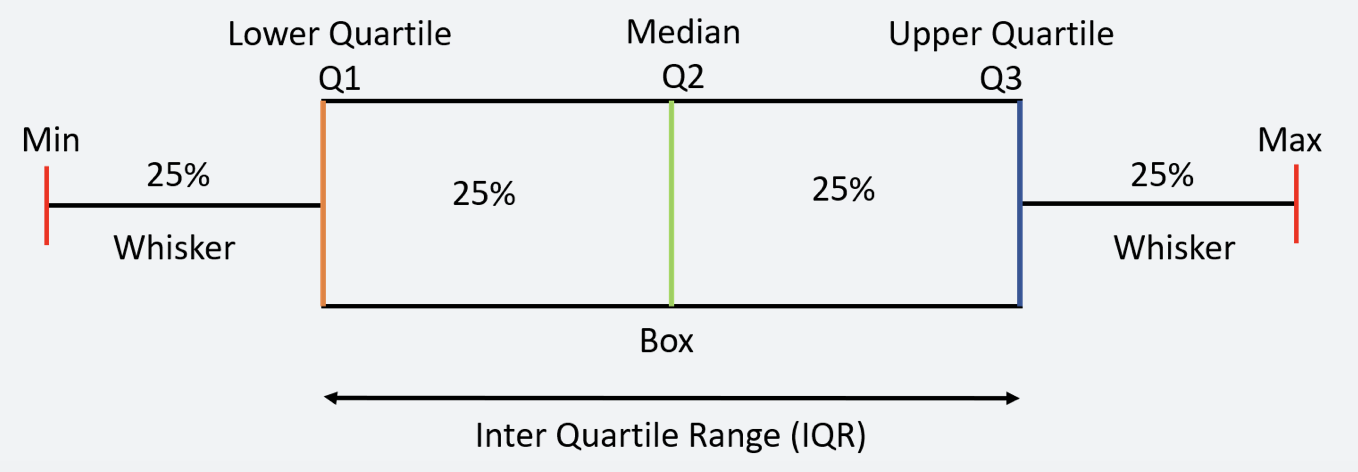

In [11]:
# Adding values ot be ore inclsuive in terms of capping
# Q3 -> 0.75
# Q1 -> 0.25
# IQR -> Q3 - Q1

# Q3 + 1.5 * IQR
upper = df['Pounds'].quantile(0.75) + 1.5 * (df['Pounds'].quantile(0.75) - df['Pounds'].quantile(0.25))
# Q1 + 1.5 * IQR
lower = df['Pounds'].quantile(0.25) - 1.5 * (df['Pounds'].quantile(0.75) - df['Pounds'].quantile(0.25))

# Capping
df.loc[df['Pounds'] > upper, 'Pounds'] = upper
df.loc[df['Pounds'] < lower, 'Pounds'] = lower

# checking for changes
df['Pounds'].describe() # we see some changes now

,Pounds
count,9.000000
mean,0.327245
std,0.047753
min,0.235568
25%,0.306553
50%,0.332139
75%,0.353876
max,0.398409


## Permutation and Random Sampling

In [12]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [13]:
# Permute rows
sampler = np.random.permutation(df.shape[0]) # permutation with the length of the axis we want to permute produces anarray of integeres indicating the new ordering
sampler

array([4, 1, 0, 2, 3])

In [14]:
df.iloc[sampler] # iloc based indexing

,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
1,7,8,9,10,11,12,13
0,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27


In [15]:
df.take(sampler) # serves same function as iloc

,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
1,7,8,9,10,11,12,13
0,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27


In [17]:
# Permute column
column_sampler = np.random.permutation(df.shape[1])
column_sampler

array([3, 0, 6, 2, 4, 1, 5])

In [21]:
# Permute column
df.take(column_sampler, axis = 'columns')

,3,0,6,2,4,1,5
0,3,0,6,2,4,1,5
1,10,7,13,9,11,8,12
2,17,14,20,16,18,15,19
3,24,21,27,23,25,22,26
4,31,28,34,30,32,29,33


In [24]:
df.sample(n=3) # selecting a random subset without replacement (same row cannot appear twice), we can use the sample method in this case

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13


In [25]:
df.sample(n=10, replace = True) # Sampling rows with replacement

,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13


## Dummy Variables

In [26]:
data = {
    'Protein Category': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meat', 'Poultry', 'Beef'],
    'Quantity': [100, 150, 90, 120, 30, 110, 160]
}

df_protein = pd.DataFrame(data)

df_protein

,Protein Category,Quantity
0,Poultry,100
1,Beef,150
2,Pork,90
3,Seafood,120
4,Specialty Meat,30
5,Poultry,110
6,Beef,160


In [27]:
# Creating dummies
dummies = pd.get_dummies(df_protein['Protein Category'], prefix = 'Protein', dtype = float) # protein category -> protein prefix
dummies

,Protein_Beef,Protein_Pork,Protein_Poultry,Protein_Seafood,Protein_Specialty Meat
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0


In [28]:
df_with_dummies = df_protein.join(dummies) # usig join
df_with_dummies

,Protein Category,Quantity,Protein_Beef,Protein_Pork,Protein_Poultry,Protein_Seafood,Protein_Specialty Meat
0,Poultry,100,0.0,0.0,1.0,0.0,0.0
1,Beef,150,1.0,0.0,0.0,0.0,0.0
2,Pork,90,0.0,1.0,0.0,0.0,0.0
3,Seafood,120,0.0,0.0,0.0,1.0,0.0
4,Specialty Meat,30,0.0,0.0,0.0,0.0,1.0
5,Poultry,110,0.0,0.0,1.0,0.0,0.0
6,Beef,160,1.0,0.0,0.0,0.0,0.0


In [29]:
# Adding organic and grassfed to have combined catgeories
df_protein['Protein Category'] = ['Poultry - Organic', 'Beef', 'Pork', 'Seafood', 'Specialty Meat', 'Poultry', 'Beef - Grassfed']

complex_dummies = df_protein['Protein Category'].str.get_dummies('-') # lets create dummies for multiple categories in a cell

df_protein_complex = df_protein.join(complex_dummies.add_prefix('Protein_')) # joining the dummies

df_protein_complex

,Protein Category,Quantity,Protein_ Grassfed,Protein_ Organic,Protein_Beef,Protein_Beef,Protein_Pork,Protein_Poultry,Protein_Poultry,Protein_Seafood,Protein_Specialty Meat
0,Poultry - Organic,100,0,1,0,0,0,0,1,0,0
1,Beef,150,0,0,1,0,0,0,0,0,0
2,Pork,90,0,0,0,0,1,0,0,0,0
3,Seafood,120,0,0,0,0,0,0,0,1,0
4,Specialty Meat,30,0,0,0,0,0,0,0,0,1
5,Poultry,110,0,0,0,0,0,1,0,0,0
6,Beef - Grassfed,160,1,0,0,1,0,0,0,0,0


# 8.2 Combining and Merging Datasets - Coding Assesment Part 2 (Week2)

In [30]:
# lets keep using the protein dataframe

data = {
    'Protein Category': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meat', 'Poultry', 'Beef'],
    'Quantity': [100, 150, 90, 120, 30, 110, 160]
}

df_protein = pd.DataFrame(data)

# lets create a new one containing some prices

data_prices = {
    'Protein Category': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meat'],
    'Price per Unit': [5.50, 7.25, 4.50, 8.00, 10.00]
}

df_prices = pd.DataFrame(data_prices)

In [32]:
df_protein

,Protein Category,Quantity
0,Poultry,100
1,Beef,150
2,Pork,90
3,Seafood,120
4,Specialty Meat,30
5,Poultry,110
6,Beef,160


In [31]:
df_prices

,Protein Category,Price per Unit
0,Poultry,5.50
1,Beef,7.25
2,Pork,4.50
3,Seafood,8.00
4,Specialty Meat,10.00


## Merge te dataframes

In [33]:
# Merginh df_protein and df_protein_price
df = pd.merge(df_protein, df_prices, on = 'Protein Category') # inner join by default (no parameter)
df

,Protein Category,Quantity,Price per Unit
0,Poultry,100,5.50
1,Poultry,110,5.50
2,Beef,150,7.25
3,Beef,160,7.25
4,Pork,90,4.50
5,Seafood,120,8.00
6,Specialty Meat,30,10.00


## Outer Joins

In [34]:
# Using outer join to see all data including those without matches in one of dfs
# outer join will list all entries, filling missing matches with NaN values for prices or quantities where no corresponding entry exists
df_outer_merged = pd.merge(df_protein, df_prices, on = 'Protein Category', how = 'outer')

df_outer_merged

,Protein Category,Quantity,Price per Unit
0,Poultry,100,5.50
1,Poultry,110,5.50
2,Beef,150,7.25
3,Beef,160,7.25
4,Pork,90,4.50
5,Seafood,120,8.00
6,Specialty Meat,30,10.00


Outcome for this excercise is that since there are no unique categories in either dfs that don't have a counterpart in the other, both the inner and outer joins results in the same set of merged data. Basically, no addiitonal rows with NaN values are introduced in the outer join because every key from both dfs finds a match.

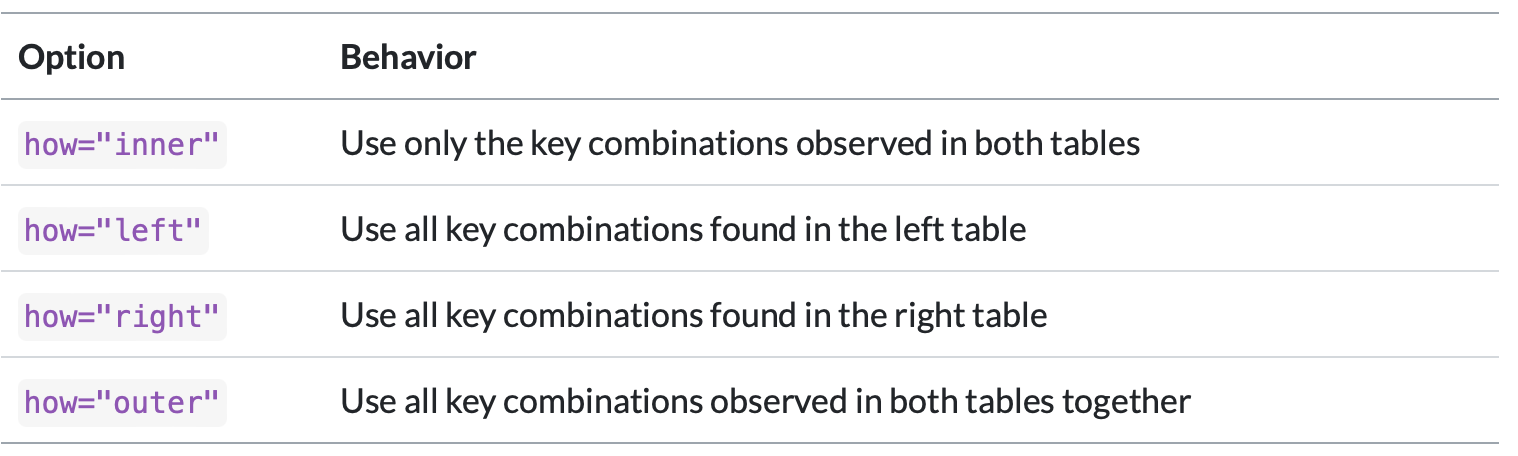

## Concataneting Along an Axis

In [37]:
data = {
    'Protein Category': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meat'],
    'Quantity': [100, 150, 90, 120, 30]
}

data_prices = {
    'Price per Unit': [5.50, 7.25, 4.50, 8.00, 10.00]
}


df_protein = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e'])
df_prices = pd.DataFrame(data_prices, index=['a', 'b', 'c', 'd', 'e'])

In [38]:
df_protein

,Protein Category,Quantity
a,Poultry,100
b,Beef,150
c,Pork,90
d,Seafood,120
e,Specialty Meat,30


In [39]:
df_prices

,Price per Unit
a,5.50
b,7.25
c,4.50
d,8.00
e,10.00


### Mergin using Indexes

This merge will combined rows where the index values match.

In [40]:
df = pd.merge(df_protein, df_prices, left_index = True, right_index = True)
df

,Protein Category,Quantity,Price per Unit
a,Poultry,100,5.50
b,Beef,150,7.25
c,Pork,90,4.50
d,Seafood,120,8.00
e,Specialty Meat,30,10.00


In [41]:
df_outer = pd.merge(df_protein, df_prices, left_index = True, right_index = True, how = 'outer')
df_outer # same above scenario

,Protein Category,Quantity,Price per Unit
a,Poultry,100,5.50
b,Beef,150,7.25
c,Pork,90,4.50
d,Seafood,120,8.00
e,Specialty Meat,30,10.00


Example using NaN values

In [42]:
data = {
    'Protein Category': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meat'],
    'Quantity': [100, 150, 90, 120, 30]
}


df_prices = {
    'Price per Unit': [5.50, 7.25, 4.50, 8.00, 10.00]
}


df_protein = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e'])
df_prices = pd.DataFrame(data_prices, index=['a', 'b', 'f', 'g', 'h']) # 'f', 'g', 'h' do not match 'c', 'd', 'e'

In [43]:
df_prices

,Price per Unit
a,5.50
b,7.25
f,4.50
g,8.00
h,10.00


In [44]:
# Merging using outer join to include all indices
df = pd.merge(df_protein, df_prices, left_index = True, right_index = True, how = 'outer')
df

,Protein Category,Quantity,Price per Unit
a,Poultry,100.0,5.50
b,Beef,150.0,7.25
c,Pork,90.0,NaN
d,Seafood,120.0,NaN
e,Specialty Meat,30.0,NaN
f,NaN,NaN,4.50
g,NaN,NaN,8.00
h,NaN,NaN,10.00


- Indices: 'f', 'g', 'h' in df_prices do not have matching entries in df_protein, so their 'Protein Category' and 'Quantity' are NaN.

## Combining Data with Overlap

In [45]:
data = {
    'Protein Category': ["Poultry", "Beef", "Pork", "Seafood", np.nan],
    'Quantity': [100, np.nan, 90, np.nan, 30],
    'Price per Unit': [5.50, 7.25, np.nan, 8.00, np.nan]
}


data_prices = {
    'Protein Category': [np.nan, "Beef", "Pork", "Seafood", "Specialty Meat"],
    'Quantity': [110, 150, np.nan, 120, 35],
    'Price per Unit': [np.nan, np.nan, 4.50, 8.50, 10.00]
}


df_protein = pd.DataFrame(data, index=["a", "b", "c", "d", "e"])
df_prices = pd.DataFrame(data_prices, index=["a", "b", "c", "d", "f"])

In [46]:
df_protein

,Protein Category,Quantity,Price per Unit
a,Poultry,100.0,5.50
b,Beef,NaN,7.25
c,Pork,90.0,NaN
d,Seafood,NaN,8.00
e,NaN,30.0,NaN


In [47]:
df_prices

,Protein Category,Quantity,Price per Unit
a,NaN,110.0,NaN
b,Beef,150.0,NaN
c,Pork,NaN,4.5
d,Seafood,120.0,8.5
f,Specialty Meat,35.0,10.0


In [48]:
# Using the combine_first to fill missing values in df_protein with values from df_prices
df = df_protein.combine_first(df_prices)
df

,Protein Category,Quantity,Price per Unit
a,Poultry,100.0,5.50
b,Beef,150.0,7.25
c,Pork,90.0,4.50
d,Seafood,120.0,8.00
e,NaN,30.0,NaN
f,Specialty Meat,35.0,10.00


As a result:
- b -> Quantity' filled from df_prices where df_protein was NaN.

- c -> 'Price per Unit' filled from df_prices.
- d -> Quantity' and 'Price per Unit' filled/updated from df_prices.
- e -> 'Protein Category' and 'Price per Unit' from df_protein still NaN, no overlap in df_prices.
f -> Extra row from df_prices where index 'f' had no match in df_protein.